In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bioAI.mplstyle")

import sys
sys.path.append('../')
from utils import rotation_matrix
from plotting_functions import set_size

In [3]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
savefigs = True

In [4]:
def circle_ndim(dimension, res=1000):
    """
    Returns a circle in n dimensions with radius r.
    """
    x = np.linspace(0, 1, res)
    circ = np.vstack([np.cos(2*np.pi*x + i*np.pi/dimension) for i in range(dimension)])#/(np.sqrt(dimension/2))
    return x, circ

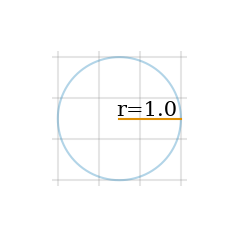

In [5]:
plt.close("all")
figsize = set_size(fraction=(1/3,1/3),mode='square')
fig, ax = plt.subplots(figsize=figsize)#,dpi=300)

# Create a grid
grid_lines = np.linspace(-1, 1, 4)  # Adjust the number of lines as needed
for line in grid_lines:
    ax.axhline(y=line, color="grey", alpha=0.2)  # Horizontal lines
    ax.axvline(x=line, color="grey", alpha=0.2)  # Vertical lines

_, circ = circle_ndim(2)
ax.plot(*circ, color=color_cycle[0], alpha=0.3)
ax.plot([0,1],[0,0], color=color_cycle[1])
# center text on horisontal line and lower on vertical line
ax.text(0.45,0.15,"r=1.0", ha="center", va="center")
ax.axis("equal")
ax.axis("off")

fig.tight_layout(pad=2.5, h_pad=0, w_pad=0)
if savefigs:
    fig.savefig('../results/ring-2d')

(-1.5556349186104046,
 1.5556349186104046,
 -1.5556349186104046,
 1.5556349186104046)

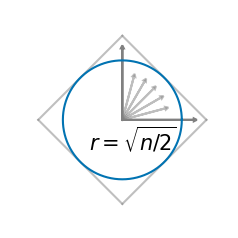

In [6]:
plt.close("all")
plt.plot([np.sqrt(2),0],[0,np.sqrt(2)], color="grey", alpha=0.5)
plt.plot([-np.sqrt(2),0],[0,np.sqrt(2)], color="grey", alpha=0.5)
plt.plot([np.sqrt(2),0],[0,-np.sqrt(2)], color="grey", alpha=0.5)
plt.plot([-np.sqrt(2),0],[0,-np.sqrt(2)], color="grey", alpha=0.5)
v = np.array([0.75,0])
plt.arrow(0,0,*rotation_matrix(15)@v, color="grey", alpha=0.5, head_width=0.05, head_length=0.05)
plt.arrow(0,0,*rotation_matrix(30)@v, color="grey", alpha=0.5, head_width=0.05, head_length=0.05)
plt.arrow(0,0,*rotation_matrix(45)@v, color="grey", alpha=0.5, head_width=0.05, head_length=0.05)
plt.arrow(0,0,*rotation_matrix(60)@v, color="grey", alpha=0.5, head_width=0.05, head_length=0.05)
plt.arrow(0,0,*rotation_matrix(75)@v, color="grey", alpha=0.5, head_width=0.05, head_length=0.05)
plt.arrow(0,0,0,np.sqrt(2)*0.85, color="grey", head_width=0.05, head_length=0.05)
plt.arrow(0,0,np.sqrt(2)*0.85,0, color="grey", head_width=0.05, head_length=0.05)
plt.plot(*circ, color=color_cycle[0])
#plt.plot([0,1],[0,0], color=color_cycle[1])
# center text on horisontal line and lower on vertical line
plt.text(0.18,-0.5,r"$r=\sqrt{n/2}$", ha="center")
plt.axis("equal")
plt.axis("off")

#if savefigs:
#    plt.savefig('../results/ring-nd')

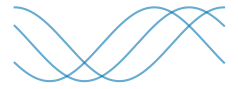

In [9]:
plt.close("all")
figsize = set_size(fraction=(1/3,1/8),mode='square')
fig, ax = plt.subplots(figsize=figsize)#,dpi=300)

x, circ = circle_ndim(3)
[ax.plot(x, circ[i], color=color_cycle[0], alpha=0.6) for i in range(len(circ))]
plt.xticks([])
plt.yticks([])
# remove y axis
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.tight_layout(pad=0.2, h_pad=0, w_pad=0)
if savefigs:
    fig.savefig('../results/wave-{}d'.format(len(circ)))

[0.5004995 0.4995005]
[27.39979015 27.37243139]
[[-8.16496581e-01 -4.08248290e-01  4.08248290e-01]
 [ 1.83553145e-16 -7.07106781e-01 -7.07106781e-01]]


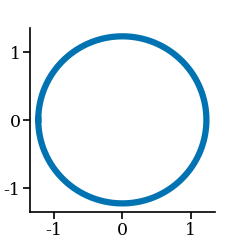

In [10]:
dimension=3
x, circ = circle_ndim(dimension)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(circ.T)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
ld = pca.transform(circ.T)
plt.close("all")
plt.plot(ld[:,0], ld[:,1], lw=3)
print(pca.components_)

In [11]:
one = np.argmax(circ[0], axis=0)
two = np.argmax(circ[1], axis=0)
three = np.argmax(circ[2], axis=0)
print(one, two, three)
print(circ[:,one], circ[:,two],2, circ[:,three])

0 833 666
[ 1.   0.5 -0.5] [0.50272095 0.99999506 0.49727411] 2 [-0.5  0.5  1. ]


In [12]:
x = circ[:,one]
y = circ[:,two]
# orthogonalize y to x, and make it the same length (radius of circle)
y = y - np.dot(x,y)*x / np.linalg.norm(x)**2 # rejection of y on x
y = y / np.linalg.norm(y)
y = y * np.linalg.norm(x)
basis = np.vstack([x,y])
print(basis)

[[ 1.         0.5       -0.5      ]
 [ 0.         0.8660254  0.8660254]]


In [13]:
#samples = np.random.uniform(-1,1,(5000,2))
samples = np.array([[-1,1], [1,1], [1,-1], [-1,-1]])#, [0,1], [1,0], [0,-1], [-1,0]])
samples = basis.T @ samples.T

In [14]:
np.linalg.norm(y), np.linalg.norm(x), y @ x

(1.224744871391589, 1.224744871391589, 0.0)

In [15]:
# radius of circle
np.linalg.norm(x), np.sqrt(dimension/2)

(1.224744871391589, 1.224744871391589)

60 -45


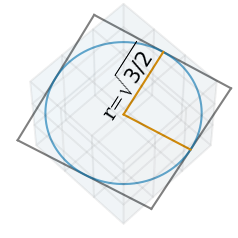

In [16]:
plt.close("all")
figsize = set_size(fraction=(1/3,1/3),mode='square')
#plot lines defining a cube
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

# Define voxel grid coordinates
# Adjust the coordinates to fit within the [-1, 1] range
vx, vy, vz = np.indices((4, 4, 4)) / 1.5 - 1
#vx, vy, vz = vx[:-1, :-1, :-1], vy[:-1, :-1, :-1], vz[:-1, :-1, :-1]
voxels = np.ones((len(vx)-1, len(vy)-1, len(vz)-1), dtype=bool)

# Add the voxels to the plot
ax.voxels(vx, vy, vz, voxels, alpha=0.03, edgecolor='k')

# Add the voxels to the plot
#ax.voxels(*(np.indices((4, 4, 4)) - 1.5), np.ones((3, 3, 3), dtype=bool), edgecolor='k', alpha=0.1)

# plot plane spanned by x and y (plane which circle lies in)
[ax.plot(*zip(samples[:,i], samples[:,i+1]), color="grey") for i in range(samples.shape[-1]-1)]
ax.plot(*zip(samples[:,-1], samples[:,0]), color="grey")
# plot the circle
ax.plot(*circ, color=color_cycle[0], alpha=0.6)
# plot circle orthogonal basis
ax.plot(*zip(np.zeros(3), x), color=color_cycle[1])
ax.plot(*zip(np.zeros(3), y), color=color_cycle[1])
# center text on horisontal line and lower on vertical line
ax.text(*(-0.05*y+0.05*x),"r=$\sqrt{3/2}$", zdir=tuple(y), ha="center")
ax.axis("equal")
ax.axis("off")
# set view angle to respect the axis
#ax.view_init(15, 15)
ax.view_init(60, -45)
print(ax.elev, ax.azim)

#fig.tight_layout(pad=0, h_pad=0, w_pad=0)
#if savefigs:
#    fig.savefig('../results/ring-3d')

# Render the plot, then adjust the axes bounding box
plt.draw()  # This renders the plot
pos = ax.get_position()  # Get the original position
new_pos = [-0.15,-0.15,1.3,1.3]  # Increase size by 20%
ax.set_position(new_pos)  # Set the new position

if savefigs:
    fig.savefig('../results/ring-3d')#, bbox_inches='tight', pad_inches=0)

In [17]:
print(ax.elev, ax.azim)

60 -45


0 0


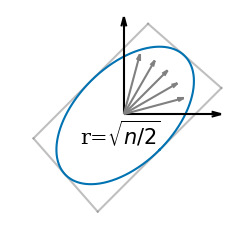

In [18]:
plt.close("all")
figsize = set_size(fraction=(1/3,1/3),mode='square')
#plot lines defining a cube
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')
# plot "dummy" axes of n-dimensions
# Arrow parameters
arrow_length = 1 * np.sqrt(2)
arrow_length_ratio = 0.1

# Plot "dummy" axes with arrowheads
# quiver is stupid and does not plot arrows if the length is zero
ax.quiver(0, 0, 0, 0, 1e-15, arrow_length, color="black", arrow_length_ratio=arrow_length_ratio)
#ax.quiver(0, 0, 0, 0, rotated_v[0], rotated_v[1], color="black", arrow_length_ratio=arrow_length_ratio)
ax.quiver(0, 0, 0, 0, arrow_length, 0, color="black", arrow_length_ratio=arrow_length_ratio)

v = np.array([0.9, 0])
for angle in [15, 30, 45, 60, 75]:
    rotated_v = rotation_matrix(angle) @ v
    ax.quiver(0, 0, 0, 0, rotated_v[0], rotated_v[1], color="grey", arrow_length_ratio=arrow_length_ratio)
rotated_v = rotation_matrix(90) @ np.array([np.sqrt(2),0])
#ax.quiver(0, 0, 0, 0, rotated_v[0], rotated_v[1], color="black", arrow_length_ratio=arrow_length_ratio)


# plot plane spanned by x and y (plane which circle lies in)
[ax.plot(*zip(samples[:,i], samples[:,i+1]), color="grey", alpha=0.5) for i in range(samples.shape[-1]-1)]
ax.plot(*zip(samples[:,-1], samples[:,0]), color="grey", alpha=.5)
# plot the circle
ax.plot(*circ, color=color_cycle[0])
# center text on horisontal line and lower on vertical line
ax.text(0,-1.9/3,-1.3/3,"r=$\sqrt{n/2}$")
ax.axis("equal")
ax.axis("off")
# set view angle to respect the axis
ax.view_init(0, 0)
print(ax.azim, ax.elev)

fig.tight_layout(pad=0, h_pad=0, w_pad=0)


# Render the plot, then adjust the axes bounding box
plt.draw()  # This renders the plot
pos = ax.get_position()  # Get the original position
new_pos = [-0.2,-0.2,1.4,1.4]  # Increase size by 20%
ax.set_position(new_pos)  # Set the new position

if savefigs:
    fig.savefig('../results/ring-nd')